In [2]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt

# KRATKO POROČILO

V projektni nalogi bom pod mentorstvom GEN-I analizirala in napovedovala odjem električne energije **gospodinjskih odjemalcev**. V analizo niso vključeni samooskrbni odjemalci, torej tisti, ki ima sončno elektrarno. Gre za obravnavo časovne vrste: odjema električne energije skozi čas. 

Glavni cilj projekta je sestaviti metodo, model, ki bo napovedal odjem za celotni naslednji dan (za naslednjih 24 ur), glede na temperaturo in sevanje. 

Podjetje GEN-I je pripravilo tabelo podatkov, sestavljeno iz sedem stolpcev:

- `DateTimeStartUTC`: univerzalni koordinirani čas,
- `DateTimeStartCET`: srednjeevropski čas,
- `Odjem ACT`: odjem električne energije,
- `Temperatura ACT`: dejanska temperatura, 
- `Temperatura FC`: napovedana temperatura,
- `Sevanje ACT`: dejansko sevanje in
- `Sevanje FC`: napovedano sevanje. 

Uporabljala bom vse stolpce, razen stolpca `DateTimeStartUTC`, saj v okviru časa ključen stolpec `DateTimeStartCET`.  

Gre za dejanske podatke, ki so bili zaradi varnosti malce prilagojeni. 

Odjem je podan za odboje od $1$. novembra $2021$ do $12$. februarja $2024$, na vsakih $15$ minut. Vsega skupaj je $80063$ enot podatkov. 

In [3]:
podatki = pd.read_csv(os.path.join('C:/Users/Uporabnik/OneDrive/Namizje/SOLA/MAGISTERIJ/MATEMATIKA Z RACUNALNIKOM/GospodinjskiOdjemalci.csv'), sep=';')
podatki["DateTimeStartCET"] = podatki["DateTimeStartCET"].apply(pd.to_datetime)
podatki = podatki.sort_values(by=['DateTimeStartCET'])
podatki

,DateTimeStartUTC,DateTimeStartCET,Odjem ACT,Temperatura ACT,Temperatura FC,Sevanje ACT,Sevanje FC
0,31.10.2021 23:00,2021-01-11 00:00:00,0.000010,3.60,5.300,0.0,0.0
1,31.10.2021 23:15,2021-01-11 00:15:00,0.000009,3.60,5.300,0.0,0.0
2,31.10.2021 23:30,2021-01-11 00:30:00,0.000009,3.60,5.300,0.0,0.0
3,31.10.2021 23:45,2021-01-11 00:45:00,0.000009,3.60,5.300,0.0,0.0
4,1.11.2021 00:00,2021-01-11 01:00:00,0.000008,3.45,5.300,0.0,0.0
...,...,...,...,...,...,...,...
80059,12.02.2024 21:45,2024-12-02 22:45:00,0.000012,8.00,3.375,0.0,0.0
80060,12.02.2024 22:00,2024-12-02 23:00:00,0.000012,7.90,3.200,0.0,0.0
80061,12.02.2024 22:15,2024-12-02 23:15:00,0.000011,7.80,3.300,0.0,0.0
80062,12.02.2024 22:30,2024-12-02 23:30:00,0.000011,7.15,3.400,0.0,0.0


In [4]:
podatki['Year'] = podatki['DateTimeStartCET'].dt.year.astype(int)
podatki['Dan'] = podatki['DateTimeStartCET'].dt.date
podatki = podatki.sort_values(by=['DateTimeStartCET'])

Analiza in napovedovanje bo izvedeno v programskem jeziku [Python](https://www.python.org/).

Poglejmo si odjem, in sicer za leti $2022$ in $2023$. Zaradi boljše preglednosti sem za vsak dan povprečila vse podatke odjema.

In [5]:
podatki_vsota_po_dnevih = podatki.groupby(['Dan', 'Year']).mean().reset_index()
podatki_vsota_po_dnevih = podatki_vsota_po_dnevih.sort_values(by=['Dan'])

C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_52996\2161900934.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  podatki_vsota_po_dnevih = podatki.groupby(['Dan', 'Year']).mean().reset_index()


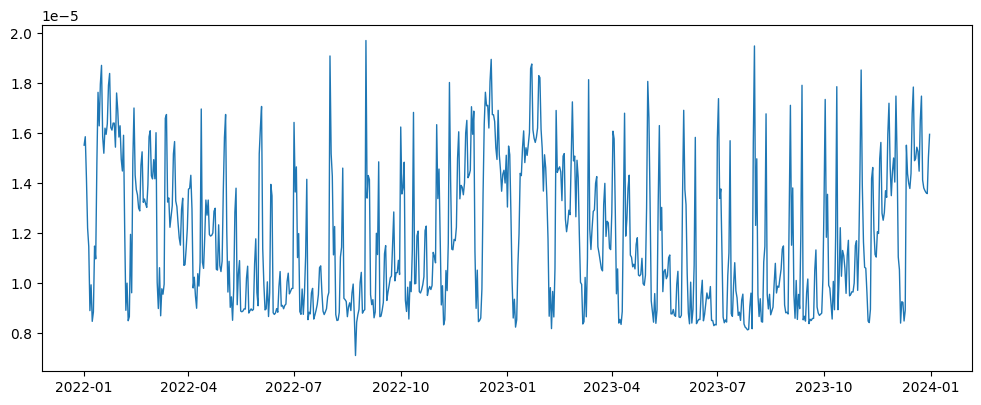

In [7]:
plt.rcParams['figure.figsize'] = [12, 4.5]
podatki_vsota_po_dnevih_2023_naprej = podatki_vsota_po_dnevih.loc[podatki_vsota_po_dnevih['Year'].isin([2022,2023])]
plt.plot(podatki_vsota_po_dnevih_2023_naprej['Dan'], podatki_vsota_po_dnevih_2023_naprej['Odjem ACT'], lw=1)

Z grafa je opaziti sezonskost: v zimskih mesecih je odjem opazno višji, v poletnih mesecih pa se zmanjša. 

Opaziti je sezonskost; večji odjem v zimskih mesecih, kar pomembno pri načrtovanju in upravljanju proizvodnje in distribucije električne energije. V zimskih mesecih je odjem višji, zaradi ogrevanja, razsvetljave, saj se števio ur dnevne svetlobe podaljša in nasploh povečane uporabe električnih aparatov, kot so grelniki, sušilniki in podobno.  